In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from mediapipe import solutions
from mediapipe.framework.formats import landmark_pb2
import numpy as np

import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision
import glob
from tqdm import tqdm
from collections import OrderedDict, defaultdict
from IPython.display import clear_output
import time
import os

In [2]:
def extract_imgs(video_fn, skip_frames=1):
    video=cv2.VideoCapture(video_fn)
    imgs=[]
    frame_count=0
    while(video.isOpened()):
        ret, frame = video.read()
        if ret==False: break
        if frame_count%skip_frames==0:
            imgs.append(frame)
        frame_count+=1
    video.release()
    return imgs


In [3]:
def keypoints_helper(imgs):
    for frame in imgs:
        extract_keypoints(frame)

In [4]:
pose = mp.solutions.pose.Pose(static_image_mode=False, min_detection_confidence=0.5, min_tracking_confidence=0.5)
def extract_keypoints(image_rgb): 
    try:
        results = pose.process(image_rgb)
        landmarks=results.pose_landmarks.landmark
    except Exception as e:
        # print('Error file=', fn)
        # print('Error=', e)
        return None
    xys=[]
    for landmark in landmarks:
        xys.append([landmark.x, landmark.y])
    xys=np.array(xys)
    return xys

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


In [5]:
def view_imgs_as_video(imgs, delay=0.05):
    for img in imgs:
        clear_output(wait=True)
        plt.imshow(img[:,:,::-1])
        plt.show()
        time.sleep(delay)

In [6]:
def draw_points(image, landmarks, keys=None):
    mp_drawing = mp.solutions.drawing_utils
    drawing_spec = mp_drawing.DrawingSpec(color=(245, 117, 66), thickness=2, circle_radius=2)
 
    if keys==None: keys=[ i for i in range(len(landmarks)) ]
     
    for key in keys:
        landmark_point = landmarks[key]
        x_px, y_px = int(landmark_point.x * image.shape[1]), int(landmark_point.y * image.shape[0])
        cv2.circle(image, (x_px, y_px), drawing_spec.circle_radius, drawing_spec.color, drawing_spec.thickness)
    return image 

In [21]:
def draw_points_xy(image, xs, ys):
    mp_drawing = mp.solutions.drawing_utils
    drawing_spec = mp_drawing.DrawingSpec(color=(245, 117, 66), thickness=2, circle_radius=2)
   
    for x,y in zip(xs, ys):
        x_px, y_px = int(x * image.shape[1]), int(y * image.shape[0])
        cv2.circle(image, (x_px, y_px), drawing_spec.circle_radius, drawing_spec.color, drawing_spec.thickness)
    return image 

In [9]:
file = "ola2_9.mp4"
curr_frames = extract_imgs(file)

In [11]:
imgs = extract_imgs("ola2_9.mp4")
kps=[]
for i, img in enumerate(imgs): 
    image_rgb=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    results = pose.process(image_rgb)
    landmarks=results.pose_landmarks.landmark[:25]
   

In [14]:
# landmarks

In [ ]:
imgs = extract_imgs("ola2_9.mp4")
imgs2=[]
for i, img in enumerate(imgs): 
    image_rgb=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    results = pose.process(image_rgb)
    landmarks=results.pose_landmarks.landmark[:25]
    img=draw_points(img, landmarks)
    imgs2.append(img)

In [17]:
ret = []
for img in imgs:
    out=extract_keypoints(img)
    if len(out)==0:
        out=extract_keypoints(img)
    
    out = out[:25].ravel()
    ret.append(out)
kps=np.array(ret)
kps.shape

(35, 50)

In [26]:
print(len(imgs))
for i, img in enumerate(imgs): 
    image_rgb=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    results = pose.process(image_rgb)
    xys=kps[i]
    xs=xys[:25]
    ys=xys[25:]
    img=draw_points_xy(image_rgb, xs, ys)
    imgs2.append(img)

35


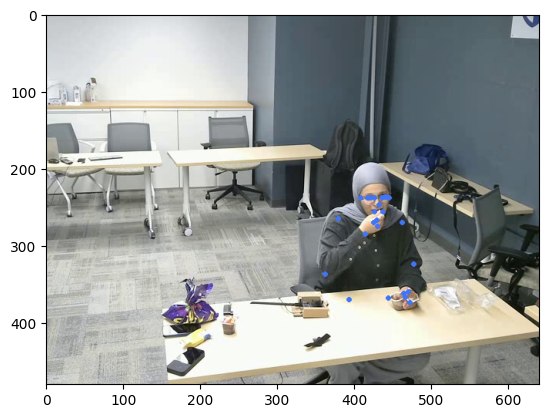

KeyboardInterrupt: 

In [28]:
view_imgs_as_video(imgs2)

In [8]:
dir = os.getcwd() + "/videocliptest/"
files = glob.glob(dir + "*.mp4")
for file in files:
    print(file)

/home/cgladu/activitynet-main/videocliptest/ns2_1.mp4
/home/cgladu/activitynet-main/videocliptest/ns2_0.mp4
/home/cgladu/activitynet-main/videocliptest/ola1_0.mp4
/home/cgladu/activitynet-main/videocliptest/ola4_0.mp4
/home/cgladu/activitynet-main/videocliptest/ns1_1.mp4
/home/cgladu/activitynet-main/videocliptest/ns1_0.mp4
/home/cgladu/activitynet-main/videocliptest/ola2_0.mp4
